# Task 1: import dataset and package

In [7]:
import pandas as pd

base = 'online_shoppers_intention.csv'
mydata = pd.read_csv(base)
df = pd.DataFrame(data = mydata)

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## 1.1

In [8]:
# get the initial look of the dataset
summary = df.describe(include='all')
print(summary)

        Administrative  Administrative_Duration  Informational  \
count     12330.000000             12330.000000   12330.000000   
unique             NaN                      NaN            NaN   
top                NaN                      NaN            NaN   
freq               NaN                      NaN            NaN   
mean          2.315166                80.818611       0.503569   
std           3.321784               176.779107       1.270156   
min           0.000000                 0.000000       0.000000   
25%           0.000000                 0.000000       0.000000   
50%           1.000000                 7.500000       0.000000   
75%           4.000000                93.256250       0.000000   
max          27.000000              3398.750000      24.000000   

        Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             12330.000000    12330.000000             12330.000000   
unique                     NaN             NaN           

In [9]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## 1.2 

In [10]:
target = df.loc[mydata['Browser']==13]
len(target)

61

In [11]:
import plotly.express as px

# Create a new column that labels browsers as 'Browser 13' or 'Other'
df['Browser_Highlight'] = df['Browser'].apply(lambda x: 'Browser 13' if x == 13 
                                              else 'Other browser')

# Create the box plot with color highlighting
fig2 = px.box(df, x='Browser', y='ExitRates',
              title="ExitRates for Browser 13 vs Others",
              labels={'Browser': 'Browser Type', 'ExitRates': 'ExitRates'},
              color='Browser_Highlight')  

fig2.show()


# Task 2: Preprocessing

In [12]:
# check the missing value
## since there is no missing value so we do not need to clean the data here
df = pd.DataFrame(data = mydata)
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
# do the max-min normalization, to avoid the certain variable over-represent
def normalize(col = df['ExitRates']):
    reslut = col.copy()
    max_value = col.max()
    min_value = col.min()
    reslut = (col - min_value) / (max_value - min_value)
    return reslut

# Convert 'Revenue' column from boolean to integer (True -> 1, False -> 0)
df['Revenue'] = df['Revenue'].astype(int)

# Drop columns that won't be useful for clustering and are not able to be normalized
# only nume data 
df_standarized= df.drop(['Month', 'VisitorType', 'Weekend'] , axis=1)

df_standarized = normalize(df_standarized)
df_standarized.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.142857,0.083333,0.000,0.052632,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.428571,0.000000,1.000,0.105263,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.285714,0.083333,0.125,0.157895,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.285714,0.166667,0.000,0.157895,0.0


# Task 3: Clustering algorithms

## 3.1 Affinity propagation clustering

Affinity Propagation is a clustering algorithm that identifies exemplars (representative points) from the dataset and assigns other points to these exemplars based on similarity. Unlike traditional algorithms like k-means, Affinity Propagation does not require you to specify the number of clusters in advance.

In [14]:
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt

X = df_standarized[['ExitRates', 'ProductRelated']]
clustering = AffinityPropagation(random_state=5).fit(X)

# Labels
labels_affinity = clustering.labels_

# visualzation
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_standarized['ExitRates'], df_standarized['ProductRelated'], c=labels_affinity, cmap='viridis')
plt.colorbar(scatter)
plt.title("Affinity Propagation Clustering (ExitRates vs ProductRelated)")
plt.xlabel('ExitRates')
plt.ylabel('ProductRelated')

plt.show()

KeyboardInterrupt: 

from the graph above, we notice that that there is no speific pattern within clusters. 
Since the algorithm failed to converge, the method struggled to identify consistent or reliable clusters. Therefore, the result, as shown in the plot, is not meaningful and would not provide useful insights of the dataset.

## 3.2 DBSCAN clustering

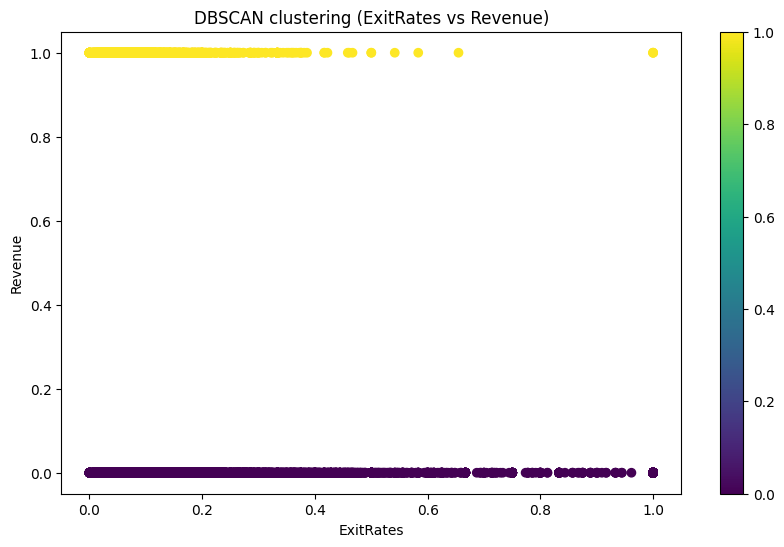

In [42]:
from sklearn.cluster import DBSCAN

X = df_standarized[['ExitRates', 'Revenue']]
dbscan = DBSCAN(eps=0.5, min_samples=2).fit(X)

# Labels
labels_dbscan = dbscan.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['ExitRates'], X['Revenue'], c=labels_dbscan, cmap='viridis')
plt.colorbar(scatter)
plt.title("DBSCAN clustering (ExitRates vs Revenue)")
plt.xlabel('ExitRates')
plt.ylabel('Revenue')
plt.show()

## 3.3 Birch clustering

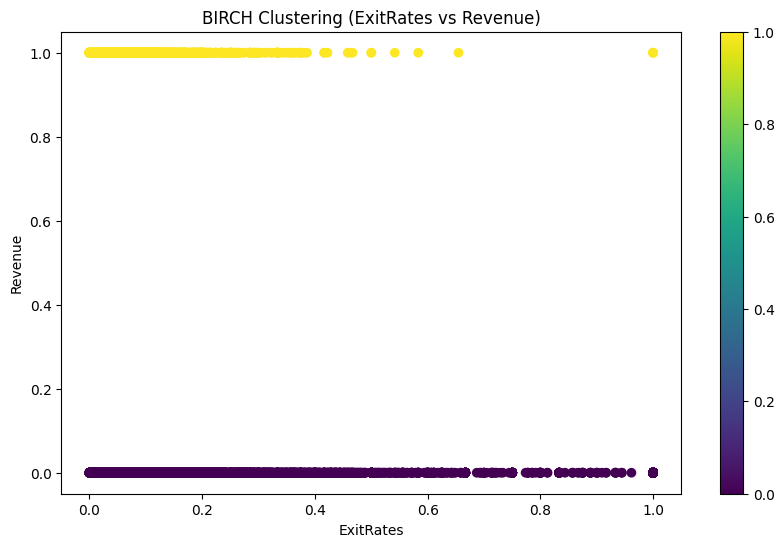

In [63]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

X = df_standarized[['ExitRates', 'Revenue']]

# Apply Birch clustering
birch = Birch(n_clusters=2, threshold=0.3).fit(X)

# Get cluster labels
labels_birch = birch.labels_

# Visualize 
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['ExitRates'], X['Revenue'], c=labels_birch, cmap='viridis')
plt.colorbar(scatter)
plt.title("BIRCH Clustering (ExitRates vs Revenue)")
plt.xlabel('ExitRates')
plt.ylabel('Revenue')
plt.show()

# Task 4: Evaluation of clustering methods

In [58]:
## 4.1 Silhouette score

# Compute Silhouette score for a result
def silhouette_score(points, labels):
    n = len(points)
    unique_clusters = set(labels)
    
    silhouette_scores = []
    
    for i in range(n):
        current_point = points[i]
        current_cluster = labels[i]
        
        # Intra-cluster distance: average distance to all other points in the same cluster
        same_cluster_points = [points[j] for j in range(n) if labels[j] == current_cluster and j != i]
        if same_cluster_points:
            a_i = sum(euclidean_distance(current_point, p) for p in same_cluster_points) / len(same_cluster_points)
        else:
            a_i = 0  # When there's no other point in the same cluster
        
        # Inter-cluster distance: minimum average distance to points in any other cluster
        b_i = float('inf')
        for other_cluster in unique_clusters:
            if other_cluster == current_cluster:
                continue
            other_cluster_points = [points[j] for j in range(n) if labels[j] == other_cluster]
            if other_cluster_points:
                avg_distance = sum(euclidean_distance(current_point, p) for p in other_cluster_points) / len(other_cluster_points)
                b_i = min(b_i, avg_distance)
        
        # Calculate silhouette score for point i
        if a_i == 0 and b_i == 0:
            silhouette = 0
        else:
            silhouette = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(silhouette)
    
    # Average silhouette score for all points
    overall_silhouette_score = sum(silhouette_scores) / n
    return overall_silhouette_score




In [ ]:
# Sihlouette score for the Affinity Propagation clustering
silhouette_score(X.values, labels_affinity)

NameError: name 'labels_affinity' is not defined

In [ ]:
# Sihlouette score for the DBSCAN clustering
silhouette_score(X.values, labels_dbscan)

0.800094877721267

In [ ]:
# Sihlouette score for the Birch clustering
silhouette_score(X.values, labels_birch)

nan

## 4.2 Davies Bouldin Score

In [67]:
from sklearn.metrics import davies_bouldin_score

# make a function so that we could evaluate three models in Task 3 at once
def evaluate_davies_bouldin(X, labels_affinity, labels_dbscan, labels_birch):
    score_affinity = davies_bouldin_score(X, labels_affinity)
    score_dbscan = davies_bouldin_score(X, labels_dbscan)
    score_birch = davies_bouldin_score(X, labels_birch)

    print(f"Davies-Bouldin Score for Affinity Propagation: {score_affinity}")
    print(f"Davies-Bouldin Score for DBSCAN: {score_dbscan}")
    print(f"Davies-Bouldin Score for Birch: {score_birch}")

# change the X to the clustering variable
X = df_standarized[['ExitRates', 'ProductRelated']]
evaluate_davies_bouldin(X, labels_affinity, labels_dbscan, labels_birch)

NameError: name 'labels_affinity' is not defined

## 4.3 Calinski-Harabasz Index

In [66]:
from sklearn.metrics import calinski_harabasz_score

## make a function so that we could evaluate three models in Task 3 at once
def evaluate_calinski_harabasz(X, labels_affinity, labels_dbscan, labels_birch):
    score_affinity = calinski_harabasz_score(X, labels_affinity)
    score_dbscan = calinski_harabasz_score(X, labels_dbscan)
    score_birch = calinski_harabasz_score(X, labels_birch)

    print(f"Calinski-Harabasz Score for Affinity Propagation: {score_affinity}")
    print(f"Calinski-Harabasz Score for DBSCAN: {score_dbscan}")
    print(f"Calinski-Harabasz Score for Birch: {score_birch}")

## change the X to the clustering variable
X = df_standarized[['ExitRates', 'ProductRelated']]
evaluate_calinski_harabasz(X, labels_affinity, labels_dbscan, labels_birch)

NameError: name 'labels_affinity' is not defined

# Task 5: Distance Functions

## 5.1 Euclidian Distance Function

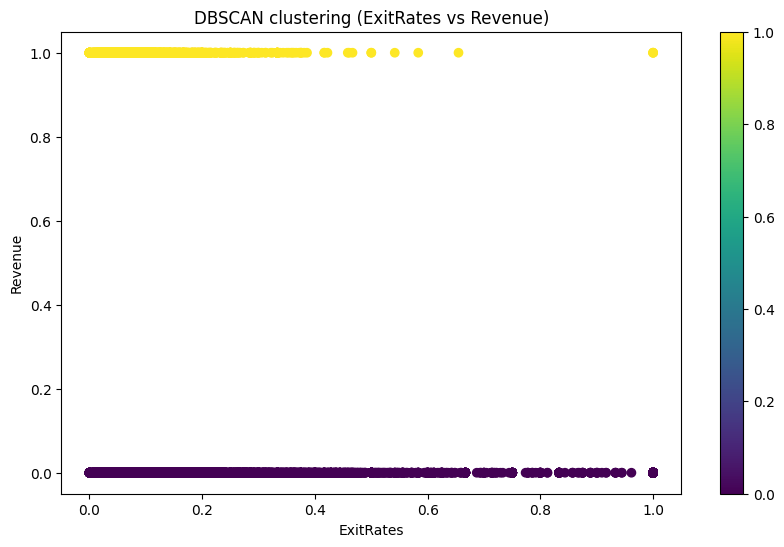

In [20]:
# Calculate Euclidian distance between points
import math
def euclidean_distance(point1, point2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

X = df_standarized[['ExitRates', 'Revenue']]
dbscan = DBSCAN(eps=0.5, min_samples=2, metric=euclidean_distance).fit(X)

# Get labels
labels_dbscan_euc = dbscan.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['ExitRates'], X['Revenue'], c=labels_dbscan, cmap='viridis')
plt.colorbar(scatter)
plt.title("DBSCAN clustering (ExitRates vs Revenue)")
plt.xlabel('ExitRates')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Sihlouette score for the DBSCAN clustering with Euclidian Distance parameter
silhouette_score(X.values, labels_dbscan_euc)

0.003453538632968602

## 5.2 Manhattan Distance Function

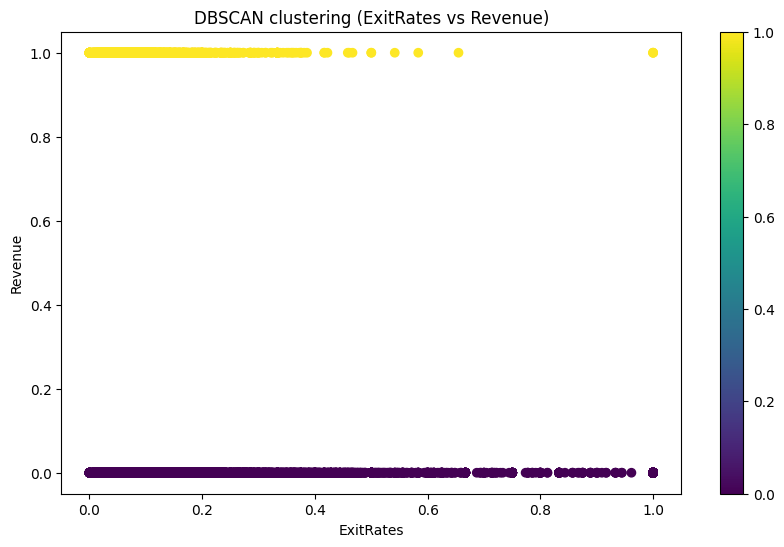

In [34]:
def manhattan_distance(point1, point2):
    return sum(abs(x - y) for x, y in zip(point1, point2))

X = df_standarized[['ExitRates', 'Revenue']]
dbscan = DBSCAN(eps=0.5, min_samples=2, metric=manhattan_distance).fit(X)

# Get labels
labels_dbscan_manh = dbscan.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['ExitRates'], X['Revenue'], c=labels_dbscan, cmap='viridis')
plt.colorbar(scatter)
plt.title("DBSCAN clustering (ExitRates vs Revenue)")
plt.xlabel('ExitRates')
plt.ylabel('Revenue')
plt.show()



In [ ]:
# Sihlouette score for the DBSCAN clustering with Manhattan Distance parameter
silhouette_score(X.values, labels_dbscan_manh)

0.003453538632968602

## 5.3 Cosine Similarity Distance Function

In [ ]:
def cosine_similarity(point1, point2):
    # Calculate dot product
    dot_product = sum(x * y for x, y in zip(point1, point2))
    
    # Calculate magnitudes of point1 and point2
    magnitude1 = math.sqrt(sum(x ** 2 for x in point1))
    magnitude2 = math.sqrt(sum(y ** 2 for y in point2))
    
    if magnitude1 == 0 or magnitude2 == 0:  # Prevent division by zero
        return 0  # If either vector is a zero vector, return 0 similarity

    # Cosine similarity is the dot product divided by the product of magnitudes
    return dot_product / (magnitude1 * magnitude2)

def cosine_distance(point1, point2):
    # Cosine distance = 1 - Cosine similarity
    return 1 - cosine_similarity(point1, point2)


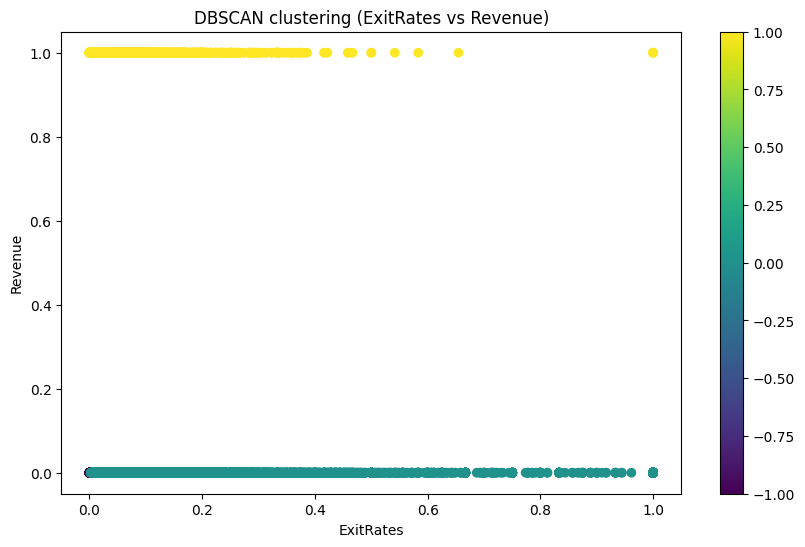

In [ ]:
X = df_standarized[['ExitRates', 'Revenue']]
dbscan = DBSCAN(eps=0.5, min_samples=2, metric=cosine_distance).fit(X)

# Get labels
labels_dbscan_cos = dbscan.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['ExitRates'], X['Revenue'], c=labels_dbscan, cmap='viridis')
plt.colorbar(scatter)
plt.title("DBSCAN clustering (ExitRates vs Revenue)")
plt.xlabel('ExitRates')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Sihlouette score for the DBSCAN clustering with Cosine similarity distance parameter
silhouette_score(X.values, labels_dbscan_cos)

0.003453538632968602